# Visualization of synthetic datasets


**Requisites**
- `cmocean`

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cmocean
%matplotlib inline

from src.data.import_data import import_df_from_zip_pkl
from src.data.make_dataset import downsample_dataframe
import numpy as np

In [2]:
plt.rcParams['axes.linewidth'] = 2.5
#plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

cmap = cmocean.cm.solar

In [17]:
synth_name  = ["basic", "soil", "weather", "soil_weather"]
df          = {}
df_day      = {}
index       = 13
for name in synth_name:
    path_to_zip = "../data/raw/synthetic_" + name + ".zip"
    df[name]    = import_df_from_zip_pkl(path_to_zip, index=index, verbose=False)
    # remove february 29th
    df[name][(df[name].index.day != 29) & (df[name].index.month != 2)]
    df_day[name] = downsample_dataframe(df[name], night_method="basic", clip_method="universal")

One synthetic type

/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


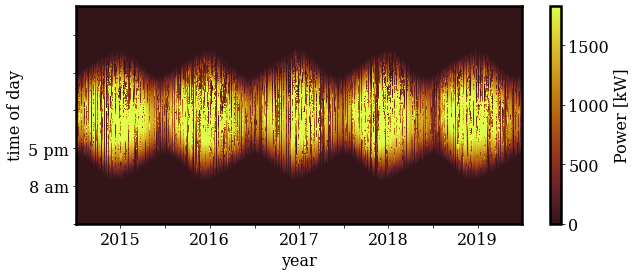

In [59]:
name    = synth_name[3]

days    = np.unique(df[name].index.date)
minutes = np.unique(df[name].minute_of_day)

yi, xi  = np.meshgrid(minutes, days)
zi      = df[name].Power.to_numpy()

fig, ax = plt.subplots(figsize=(10, 4))
im = ax.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, rasterized=True)
fig.colorbar(im, label="Power [kW]")

labels_x = [item.get_text() for item in ax.get_xticklabels()]
labels_y = [item.get_text() for item in ax.get_yticklabels()]
labels_y = ["", "8 am", "5 pm"]
labels_x = ["2015", "", "2016", "", "2017", "", "2018", "", "2019", ""]
ax.set_yticklabels(labels_y)
ax.set_xticklabels(labels_x)#, rotation=45)
ax.set_xlabel("year")
ax.set_ylabel("time of day")
fig.savefig("../reports/figures/power_" + name + ".png", bbox_inches='tight')

Generalize to all types

/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]
/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with Fixed

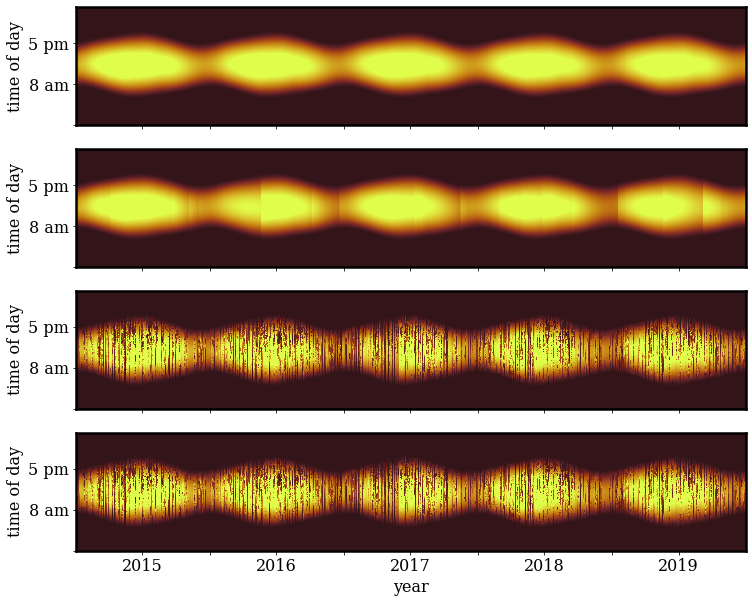

In [78]:
fig, ax = plt.subplots(len(synth_name), 1, figsize=(12, 10), sharex=True)

for i in range(len(synth_name)):
    
    name    = synth_name[i]
    
    days    = np.unique(df[name].index.date)
    minutes = np.unique(df[name].minute_of_day)
    
    yi, xi  = np.meshgrid(minutes, days)
    zi      = df[name].Power.to_numpy()
    
    im = ax[i].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, rasterized=True)
    if i==(len(synth_name)-1):
        ax[i].set_xlabel("year")
        labels_x = [item.get_text() for item in ax[i].get_xticklabels()]
        labels_x = ["2015", "", "2016", "", "2017", "", "2018", "", "2019", ""]
        ax[i].set_xticklabels(labels_x)#, rotation=45)
    
    labels_y = [item.get_text() for item in ax[i].get_yticklabels()]
    labels_y = ["", "8 am", "5 pm"]
    ax[i].set_yticklabels(labels_y)
    ax[i].set_ylabel("time of day")
fig.savefig("../reports/figures/power_all.png", bbox_inches='tight', transparent=True)

/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  from ipykernel import kernelapp as app
/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/

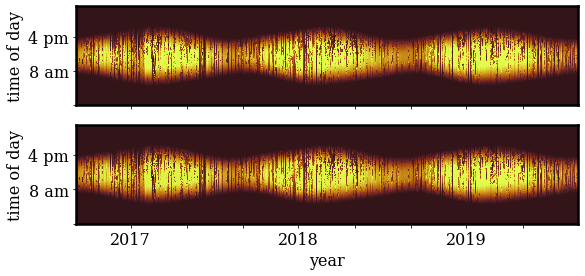

In [58]:
# Plot soil_weather with and without degrdation

name    = synth_name[3]

dff     = df[name][df[name].index.year  > 2016]

days    = np.unique(dff.index.date)
minutes = np.unique(dff.minute_of_day)

yi, xi  = np.meshgrid(minutes, days)
zi      = dff.Power.to_numpy()

zi_no_deg = (dff.Power / dff.Degradation).to_numpy()

fig, axs = plt.subplots(2, figsize=(9, 4))
im = axs[0].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, rasterized=True)
im = axs[1].pcolormesh(xi, yi, zi_no_deg.reshape(xi.shape), cmap=cmap, rasterized=True)

# fig.colorbar(im, label="Power [kW]")

labels_x = [item.get_text() for item in axs[0].get_xticklabels()]
labels_y = [item.get_text() for item in axs[0].get_yticklabels()]

labels_y = ["", "8 am", "4 pm", ""]

axs[0].set_yticklabels(labels_y)
axs[0].set_xticklabels(labels_x)
axs[0].set_ylabel("time of day")

labels_x = ["2017", "", "", "2018","", "", "2019", ""]
axs[1].set_yticklabels(labels_y)
axs[1].set_xticklabels(labels_x)#, rotation=45)
axs[1].set_xlabel("year")
axs[1].set_ylabel("time of day")
fig.savefig("../reports/figures/power_" + name + "_deg.png", bbox_inches='tight')

/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


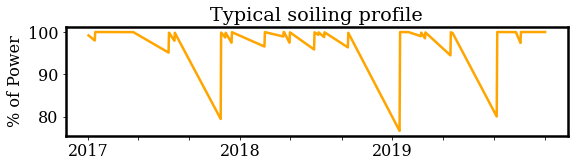

In [77]:
name    = synth_name[1]

dff     = df[name][df[name].index.year  > 2016]

fig, ax = plt.subplots(figsize=(9,2))
ax.set_title("Typical soiling profile")
ax.plot(dff.Soiling * 100, color='orange', lw=2.5)
ax.set_ylabel("% of Power")

labels_x = [item.get_text() for item in axs[0].get_xticklabels()]
labels_x = ["2017", "", "", "2018","", "", "2019", ""]
ax.set_xticklabels(labels_x)
fig.savefig("../reports/figures/power_" + name + "_soiling_prof.png", bbox_inches='tight', transparent=True)

**Downsampling**

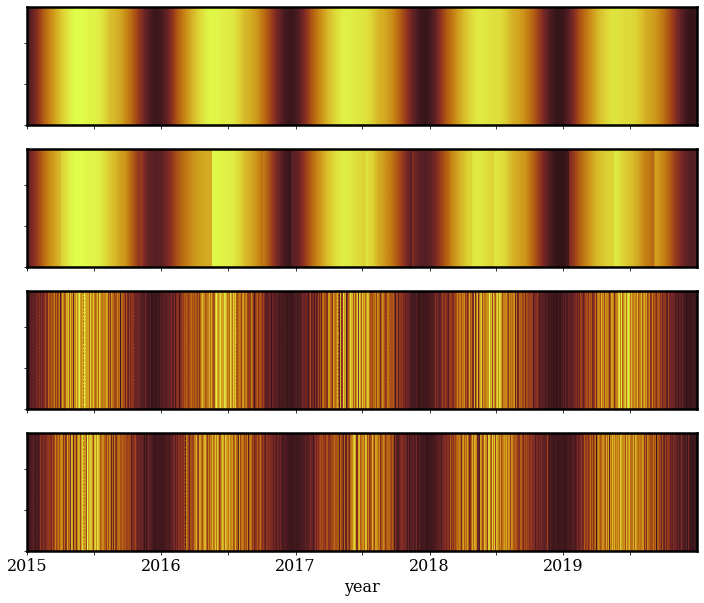

In [18]:
fig, ax = plt.subplots(len(synth_name), 1, figsize=(12, 10), sharex=True)

days    = np.unique(df[synth_name[0]].index.date)
minutes = np.unique(df[synth_name[0]].minute_of_day)

for i in range(len(synth_name)):
    
    name      = synth_name[i]
    power_day = df_day[name].Power.to_numpy()
    
    yi, xi    = np.meshgrid(minutes, days)
    zi        = df[name].Power.to_numpy()
    zi        = zi.reshape(xi.shape)
    
    for j in range(len(days)):
        zi[j, :] = power_day[j]
    
    im = ax[i].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, rasterized=True)
    if i==(len(synth_name)-1):
        ax[i].set_xlabel("year")
        labels_x = [item.get_text() for item in ax[i].get_xticklabels()]
        labels_x = ["2015", "", "2016", "", "2017", "", "2018", "", "2019", ""]
        ax[i].set_xticklabels(labels_x)#, rotation=45)
    
    labels_y = [item.get_text() for item in ax[i].get_yticklabels()]
    labels_y = ["", "", ""]
    ax[i].set_yticklabels(labels_y)
    #ax[i].set_ylabel("time of day")
fig.savefig("../../plots/power_all_downsampling.png", bbox_inches='tight')

**Methods**

I include here some references

- [Re-frame time series into supervised learning problem](https://machinelearningmastery.com/time-series-forecasting-supervised-learning/)

In [35]:
cmap_input  = cmocean.cm.solar
cmap_output = cmocean.cm.ice

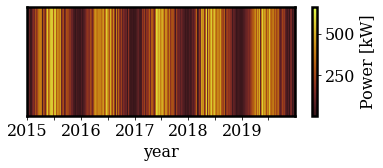

In [34]:
name    = synth_name[-1]

days      = np.unique(df[name].index.date)
minutes   = np.unique(df[name].minute_of_day)
power_day = df_day[name].Power.to_numpy()

yi, xi    = np.meshgrid(minutes, days)
zi        = df[name].Power.to_numpy()
zi        = zi.reshape(xi.shape) 
    
for j in range(len(days)):
    zi[j, :] = power_day[j]

fig, ax = plt.subplots(figsize=(6, 2))
im = ax.pcolormesh(xi, yi, zi, cmap=cmap_input, rasterized=True)
fig.colorbar(im, label="Power [kW]")

labels_x = [item.get_text() for item in ax.get_xticklabels()]
labels_y = [item.get_text() for item in ax.get_yticklabels()]
labels_y = ["", "", ""]
labels_x = ["2015", "", "2016", "", "2017", "", "2018", "", "2019", ""]
ax.set_yticklabels(labels_y)
ax.set_xticklabels(labels_x)#, rotation=45)
ax.set_xlabel("year")
ax.yaxis.set_visible(False)
#ax.set_ylabel("time of day")
fig.savefig("../../plots/power_" + name + "_downsampling_input.png", bbox_inches='tight')

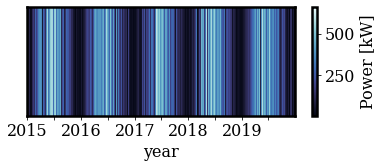

In [36]:
name    = synth_name[-1]

days      = np.unique(df[name].index.date)
minutes   = np.unique(df[name].minute_of_day)
power_day = df_day[name].Power.to_numpy()

yi, xi    = np.meshgrid(minutes, days)
zi        = df[name].Power.to_numpy()
zi        = zi.reshape(xi.shape) 
    
for j in range(len(days)):
    zi[j, :] = power_day[j]

fig, ax = plt.subplots(figsize=(6, 2))
im = ax.pcolormesh(xi, yi, zi, cmap=cmap_output, rasterized=True)
fig.colorbar(im, label="Power [kW]")

labels_x = [item.get_text() for item in ax.get_xticklabels()]
labels_y = [item.get_text() for item in ax.get_yticklabels()]
labels_y = ["", "", ""]
labels_x = ["2015", "", "2016", "", "2017", "", "2018", "", "2019", ""]
ax.set_yticklabels(labels_y)
ax.set_xticklabels(labels_x)#, rotation=45)
ax.set_xlabel("year")
ax.yaxis.set_visible(False)
#ax.set_ylabel("time of day")
fig.savefig("../../plots/power_" + name + "_downsampling_output.png", bbox_inches='tight')

In [37]:
from PyEMD import EMD, EEMD
from scipy import fftpack

In [46]:
name    = synth_name[0]

x_power = np.log(df_day[name].Power.to_numpy())

# Initialize EEMD class
eemd   = EEMD(spline_kind="cubic", extrema_detection="parabol", trials=200, noise_width=0.01)
eemd.noise_seed(1)
# run eemd / eIMFs contains the final set of IMFs
eIMFs  = eemd.eemd(x_power)
_, res = eemd.get_imfs_and_residue()
nIMFs  = eIMFs.shape[0]

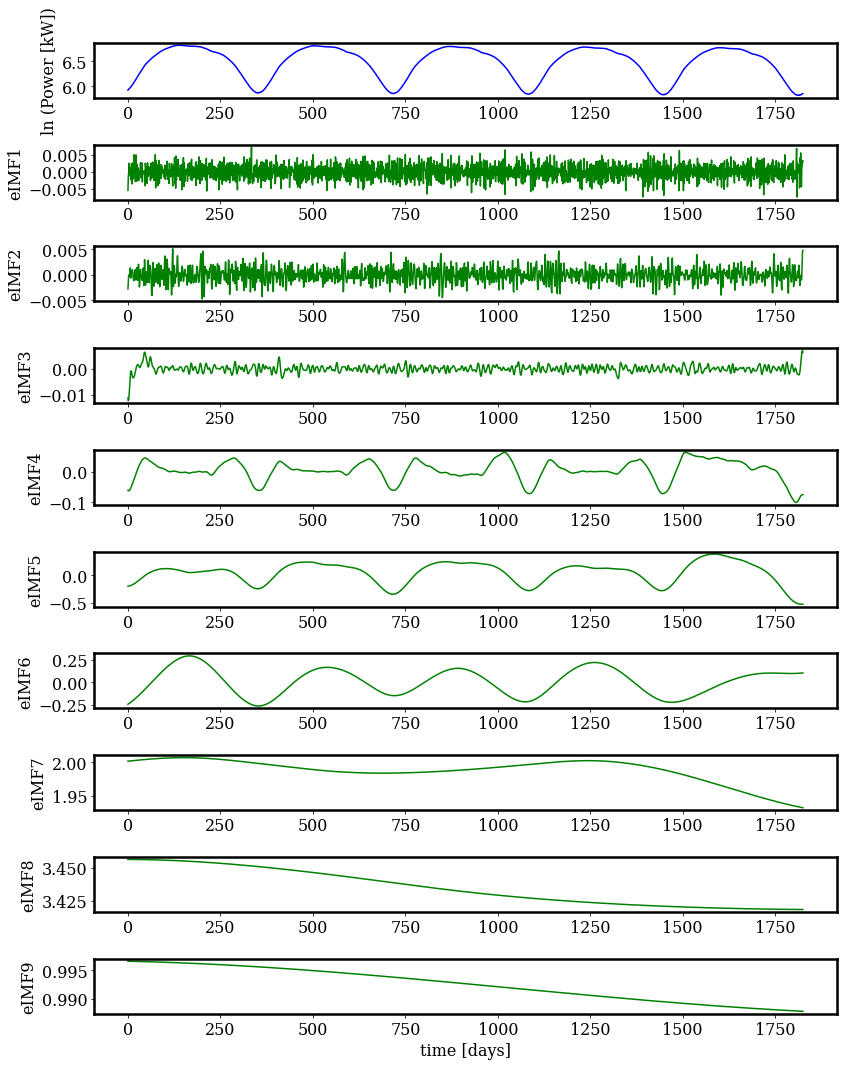

In [47]:
fig, ax = plt.subplots(nIMFs+1, 1, figsize=(12, 15))
ax[0].plot(x_power, "blue")
ax[0].set_ylabel("ln (Power [kW])")

for i in range(nIMFs):
    ax[i+1].plot(eIMFs[i], color="green")
    ax[i+1].set_ylabel("eIMF%i" %(i+1))
ax[nIMFs].set_xlabel("time [days]")
plt.tight_layout()

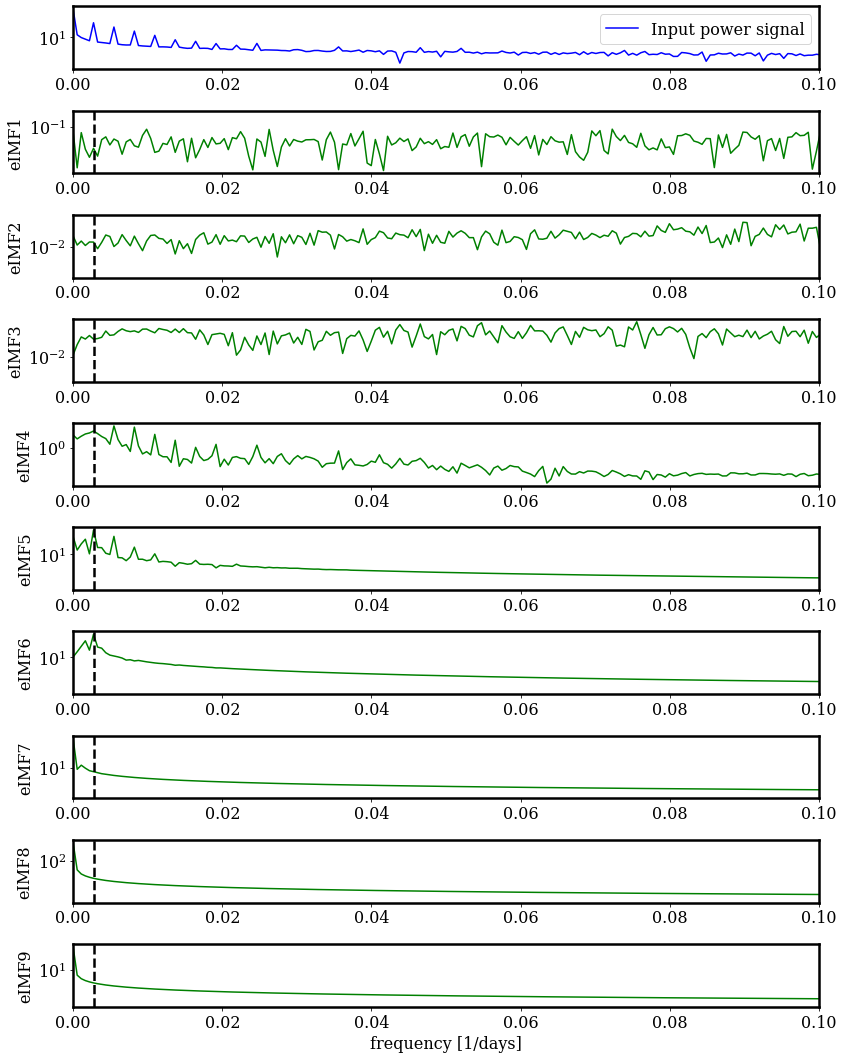

In [45]:
# Calculate FTs and plot them
plt.figure(figsize=(12, 15))

plt.subplot(nIMFs+1, 1, 1)
box_length  = df_day[name]["Power"].to_numpy().size
power_fft   = fftpack.fft(np.log(df_day[name]["Power"].to_numpy())) # FT input power signal
sample_freq = fftpack.fftfreq(box_length, d=1)
plt.plot(sample_freq[0:int(box_length/2)], np.abs(power_fft[0:int(box_length/2)]), color="blue", label="Input power signal")
plt.yscale("log")
plt.xlim([0.0, 0.1])
plt.legend()
power_IMFs = np.ones((nIMFs, box_length), dtype =complex)
for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    # Calculate FT of nth IMF
    power_IMFs[n] = fftpack.fft(eIMFs[n])
    plt.plot(sample_freq[0:int(box_length/2)], np.abs(power_IMFs[n][0:int(box_length/2)]), 'g')
    plt.ylabel("eIMF%i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
    plt.yscale("log")
    plt.xlim([0.0, 0.1])
    plt.axvline(1./356, color="k", ls="--", lw=2.5) # frequency equivalent to 1 year period
plt.xlabel("frequency [1/days]")
plt.tight_layout()

In [48]:
random   = eIMFs[0] + eIMFs[1] + eIMFs[2] 
seasonal = eIMFs[3] + eIMFs[4] + eIMFs[5] + eIMFs[6]
trend    = eIMFs[7] + eIMFs[8]

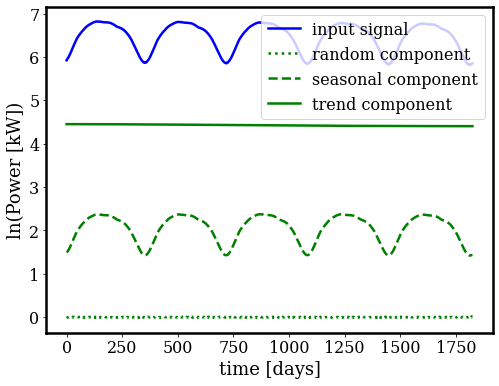

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_power, color="blue", lw=2.5, label="input signal")
ax.plot(random, color="green", ls=":", lw=2.5, label="random component")
ax.plot(seasonal, color="green", ls="--", lw=2.5, label="seasonal component")
ax.plot(trend, color="green", ls="-", lw=2.5, label="trend component")
ax.set_ylabel("ln(Power [kW])", fontsize=18)
ax.set_xlabel("time [days]", fontsize=18)
ax.legend()

In [52]:
name      = synth_name[0]

days      = np.unique(df[name].index.date)
minutes   = np.unique(df[name].minute_of_day)
power_day = df_day[name].Power.to_numpy()

yi, xi    = np.meshgrid(minutes, days)
zi_trend  = np.zeros(xi.shape) 
zi_noise  = np.zeros(xi.shape) 
zi_seas   = np.zeros(xi.shape) 

for j in range(len(days)):
    zi_trend[j, :] = np.exp(trend[j])
    zi_seas[j, :]  = np.exp(seasonal[j])
    zi_noise[j, :] = np.exp(random[j])

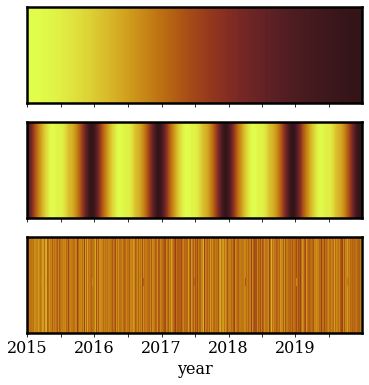

In [55]:
fig, ax = plt.subplots(3, 1, figsize=(6, 6), sharex=True)

ax[0].pcolormesh(xi, yi, zi_trend, cmap=cmap_input, rasterized=True)
ax[1].pcolormesh(xi, yi, zi_seas, cmap=cmap_input, rasterized=True)
ax[2].pcolormesh(xi, yi, zi_noise, cmap=cmap_input, rasterized=True)

labels_x = [item.get_text() for item in ax[0].get_xticklabels()]
labels_x = ["2015", "", "2016", "", "2017", "", "2018", "", "2019", ""]
ax[2].set_xticklabels(labels_x)
ax[2].set_xlabel("year")
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)
ax[2].yaxis.set_visible(False)
fig.savefig("../../plots/power_" + name + "_downsampling_decomposition.png", bbox_inches='tight')